Local_search
LM
Candidate_moves
Local_search
LM
Candidate_moves


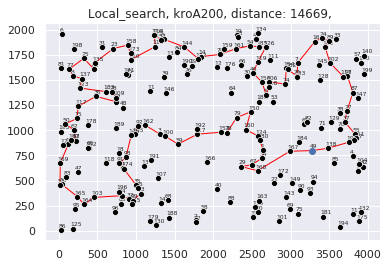

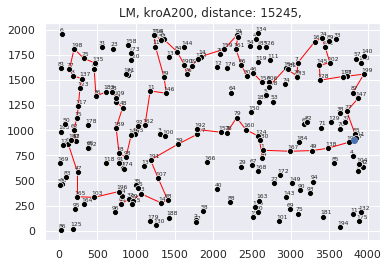

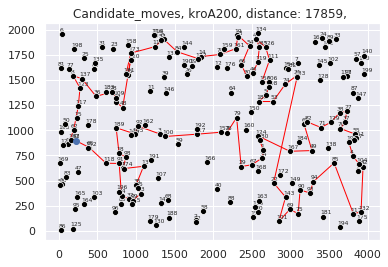

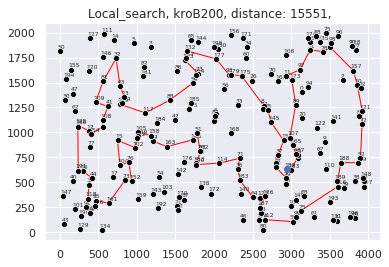

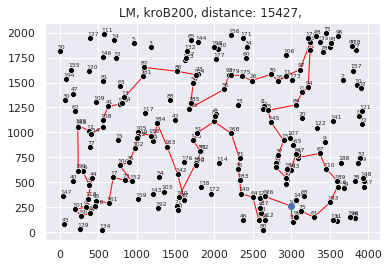

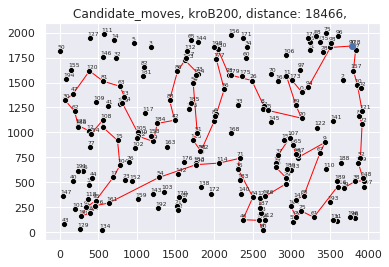

,strategy,instance,cost,time
0,Local_search,kroA200,17645,2.563273
0,Local_search,kroA200,17791,2.111627
0,Local_search,kroA200,18134,2.309332
0,Local_search,kroA200,17704,2.347190
0,Local_search,kroA200,15658,2.453069
...,...,...,...,...
0,Candidate_moves,kroB200,22753,0.693599
0,Candidate_moves,kroB200,19992,0.815681
0,Candidate_moves,kroB200,18553,0.966522
0,Candidate_moves,kroB200,21154,0.871908


In [5]:
from collections import defaultdict
from itertools import product
from random import seed

import seaborn as sns
import numpy as np
from tqdm import tqdm

from strategies.greedy_cycle.cheapest_insertion import CheapestInsertion
from api.instance import Instance
from strategies.local_search.local_search import LocalSearch
from strategies.local_search_candidates_moves.local_search_candidates_moves import LocalSearchWitchCandidatesMoves
from strategies.ls_cache.local_search_with_cache import LocalSearchWitchCache
from utils.utils import draw_solution
import pandas as pd

sns.set()
df = pd.DataFrame(columns=['strategy','instance', 'cost', 'time'])
for instance_name in ['kroA200', 'kroB200']:
    instance = Instance(name=instance_name)
    solve_strategy1: LocalSearch = LocalSearch(
        instance=instance,
        version="steepest",
        neighbourhood="edge",
    )
    solve_strategy2: LocalSearchWitchCandidatesMoves = LocalSearchWitchCandidatesMoves(instance=instance)
    solve_strategy3: LocalSearchWitchCache = LocalSearchWitchCache(instance=instance)
    
    solve_strategies = {}
    solve_strategies["Local_search"] = solve_strategy1
    solve_strategies["LM"] = solve_strategy3
    solve_strategies["Candidate_moves"] = solve_strategy2
    
    for str_id in solve_strategies.keys():
        print(str_id)
        solve_strategy = solve_strategies[str_id]
        solve_strategy.run(run_times=100)
        for s, cost, time in solve_strategy.solutions:
            df = df.append(pd.DataFrame([[str_id, instance_name, cost, time]], columns=['strategy','instance', 'cost', 'time']))
        costs = list(map(lambda x: x[1], solve_strategy.solutions))
        draw_solution(
            instance=instance,
            solution=solve_strategy.solution,
            title=f'{str_id}, {instance.name}, distance: {solve_strategy.solution_cost}, ',
            save_file_name=f'{instance.name}_{min(costs)}_{str_id}.png'
        )
df

In [6]:
df['cost'] = df['cost'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 0
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   strategy  600 non-null    object 
 1   instance  600 non-null    object 
 2   cost      600 non-null    float64
 3   time      600 non-null    float64
dtypes: float64(2), object(2)
memory usage: 23.4+ KB


In [7]:
df_cost = df.groupby(['instance', 'strategy']).agg({'cost' : ['min','mean', 'max']}).astype(int)
df_cost

cost              
                            min   mean    max
instance strategy                            
kroA200  Candidate_moves  17859  21051  26088
         LM               15245  17715  19516
         Local_search     14669  17029  19148
kroB200  Candidate_moves  18466  21644  28988
         LM               15427  17661  19713
         Local_search     15551  17043  18686

In [8]:
df_time = df.groupby(['instance','strategy']).agg({'time' : ['min','mean', 'max']}).round(3)
df_time

time              
                            min   mean    max
instance strategy                            
kroA200  Candidate_moves  0.567  0.767  1.088
         LM               1.481  1.935  2.591
         Local_search     1.884  2.305  3.046
kroB200  Candidate_moves  0.581  0.744  1.000
         LM               1.557  1.881  2.472
         Local_search     1.944  2.269  2.920

In [10]:

print(df_cost.to_latex())

\begin{tabular}{llrrr}
\toprule
        &              & \multicolumn{3}{l}{cost} \\
        &              &    min &   mean &    max \\
instance & strategy &        &        &        \\
\midrule
kroA200 & Candidate\_moves &  17859 &  21051 &  26088 \\
        & LM &  15245 &  17715 &  19516 \\
        & Local\_search &  14669 &  17029 &  19148 \\
kroB200 & Candidate\_moves &  18466 &  21644 &  28988 \\
        & LM &  15427 &  17661 &  19713 \\
        & Local\_search &  15551 &  17043 &  18686 \\
\bottomrule
\end{tabular}



In [11]:
print(df_time.to_latex())



\begin{tabular}{llrrr}
\toprule
        &              & \multicolumn{3}{l}{time} \\
        &              &    min &   mean &    max \\
instance & strategy &        &        &        \\
\midrule
kroA200 & Candidate\_moves &  0.567 &  0.767 &  1.088 \\
        & LM &  1.481 &  1.935 &  2.591 \\
        & Local\_search &  1.884 &  2.305 &  3.046 \\
kroB200 & Candidate\_moves &  0.581 &  0.744 &  1.000 \\
        & LM &  1.557 &  1.881 &  2.472 \\
        & Local\_search &  1.944 &  2.269 &  2.920 \\
\bottomrule
\end{tabular}

